In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import time
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
#import data and get a brief overview of first 5 rows
data = pd.read_csv("C:\\Users\\Mayowa\\Downloads\loan_data_set.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# DataFrame analysis 

In [3]:
data.describe(include='all')
#we add this parameter to include the categorical variables aswell
#immediatley see there are 422 Y and 192 N

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001066,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [4]:
#more information about each data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
pd.crosstab(data['Married'], data['Loan_Status'], margins=True)
#out of those who are married, 72% recieve a loan
#out of those who are not married, 63% recieve a loan

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [6]:
pd.crosstab(data['Education'], data['Loan_Status'], margins=True )
#out of the graduates, 71% recieve a loan
#out of the non graduates, 61% recieve a loan

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [7]:
pd.crosstab(data['Self_Employed'], data['Loan_Status'], margins=True )
# out of the self emlpoyed, 68% recieved a loan
# out of the not self employed, 69% recieved a loan

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [8]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins=True )
#out of those who meet the credit guidelines, 80% recieved a loan
#out of those who dont meet the credit guidelines, 8% recieved a loan

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [9]:
# identify the number of missing values
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

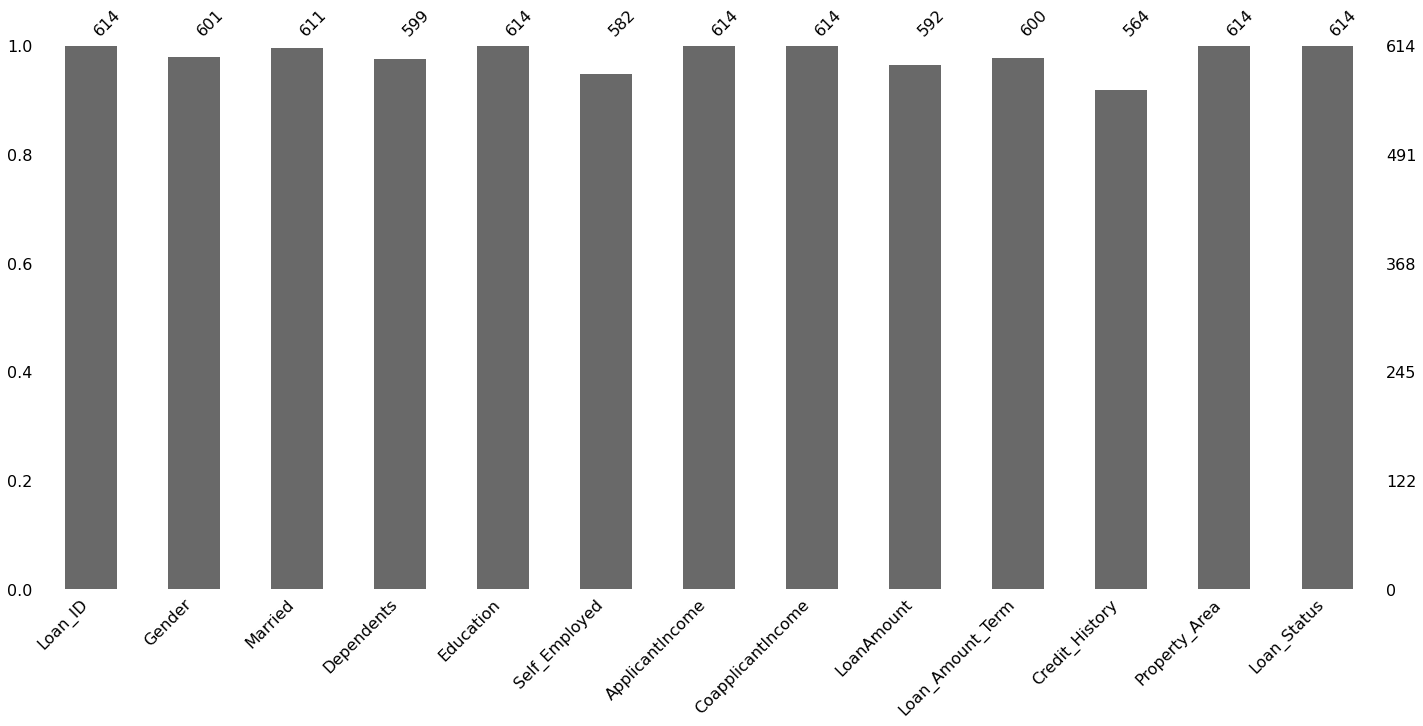

In [10]:
# bar chart showing missing values
msno.bar(data)

<AxesSubplot:>

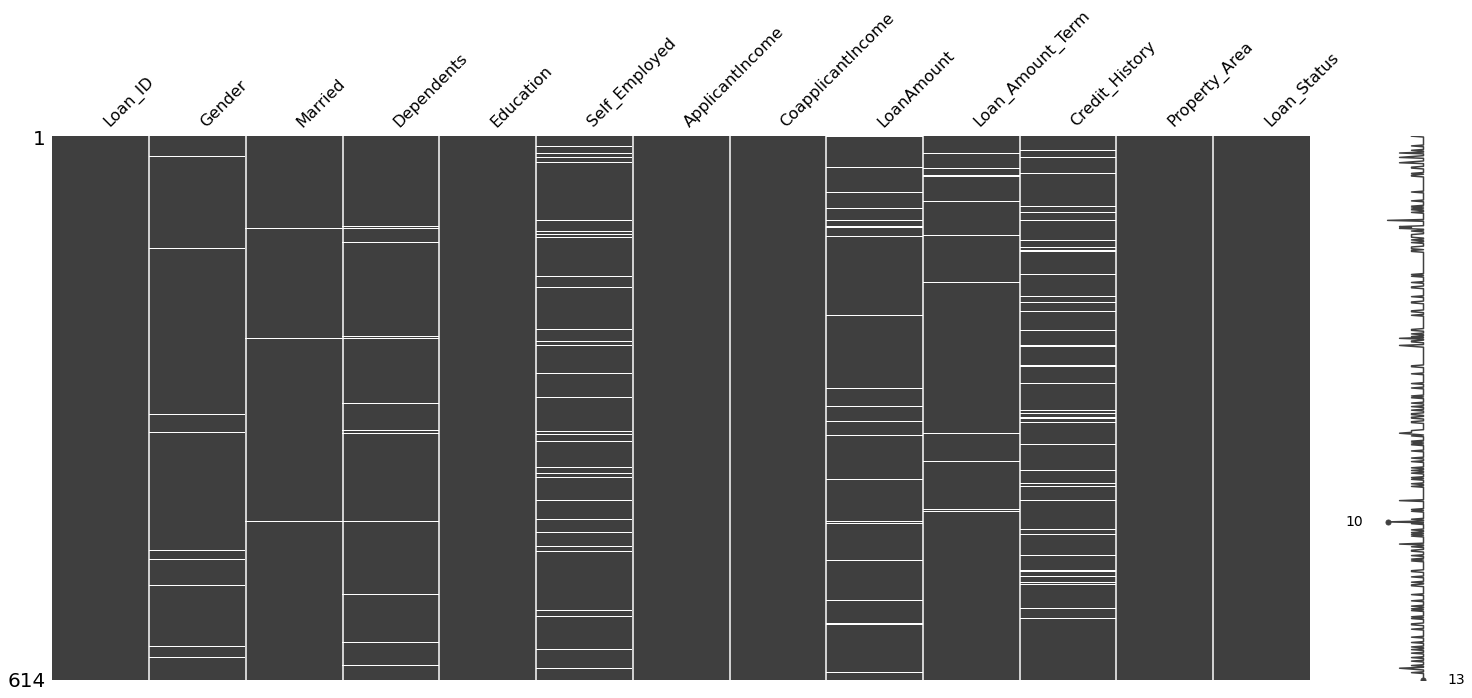

In [11]:
#matrix showing distribution of missing values
msno.matrix(data)

<AxesSubplot:>

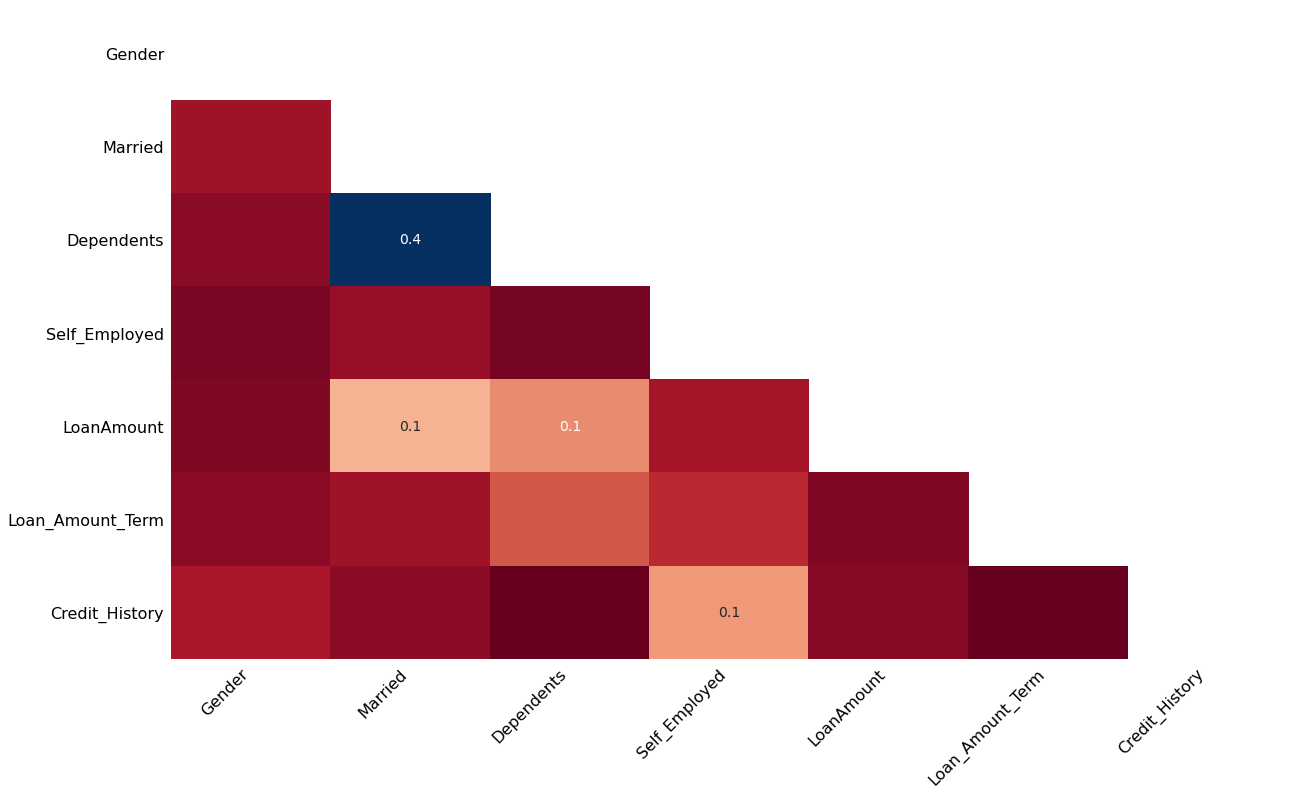

In [12]:
#heatmap showing correlation of missing values
msno.heatmap(data)

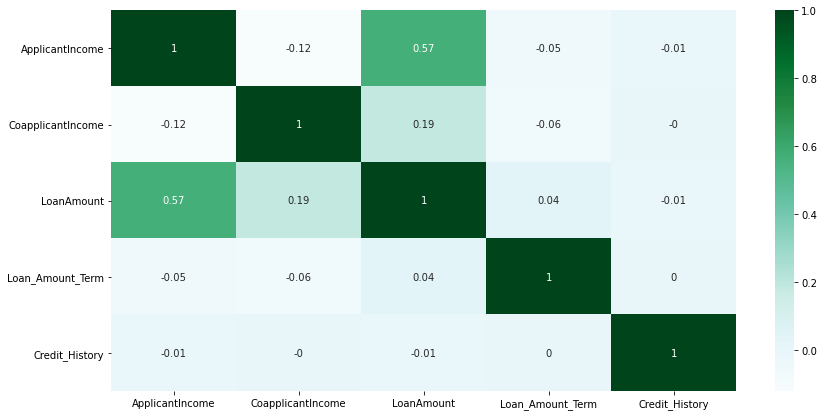

In [13]:
# variable correlation matrix describing the relationship between columns 
fig,ax=plt.subplots(figsize=(14, 7))
sns.heatmap(data=data.corr().round(2),annot=True,cmap="BuGn")
plt.show()

#  Pre-processing 

In [14]:
#### dealing with missing data

In [15]:
#drop the Loan_ID column before we begin as it does not tell us anything about the data
data.drop("Loan_ID",axis=1,inplace=True)

In [16]:
#mean and mode imputation
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [17]:
data.dropna(inplace=True)
#because theres no correlation between missing values, use listwise deletion/complete case analysis to delete the rest

In [18]:
#confirming that there are no more missing values
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
###### label encoder

In [20]:
#quick glance of the data before we convert the words to numbers
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [21]:
#label encoder from sklearn preprocessing package
le=LabelEncoder()
for col in data.columns.values:
    if data[col].dtypes=='object':
        data[col]=le.fit_transform(data[col])

In [22]:
#another glance of the data after we transform the categorical variables
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [23]:
# we can now see the types of the data has changed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    int32  
 1   Married            564 non-null    int32  
 2   Dependents         564 non-null    int32  
 3   Education          564 non-null    int32  
 4   Self_Employed      564 non-null    int32  
 5   ApplicantIncome    564 non-null    int64  
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    int32  
 11  Loan_Status        564 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 41.9 KB


In [24]:
## creation of 'HouseholdIncome'

In [25]:
#correlation of ApplicantIncome and LoanAmount
data['ApplicantIncome'].corr(data['LoanAmount'])

0.5648355224108583

In [26]:
#correlation of CoapplicantIncome and LoanAmount
data['CoapplicantIncome'].corr(data['LoanAmount'])

0.1577390833403925

In [27]:
#creation of the new variable
data['HouseholdIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [28]:
# we can now see an increased correlation with LoanAmount
data['HouseholdIncome'].corr(data['LoanAmount'])

0.6101880697583686

In [29]:
#how many values does Loan_Aount_Term contain
data['Loan_Amount_Term'].value_counts()

360.0    484
180.0     43
480.0     14
300.0     10
84.0       3
240.0      3
120.0      3
36.0       2
60.0       2
Name: Loan_Amount_Term, dtype: int64

In [30]:
#The distribution doesn't look continuos so change the values to represent the discrete nature 
data.Loan_Amount_Term.replace({36.0: 0, 60.0: 1, 84.0: 2, 120.0: 3, 180.0: 4, 240.0: 5, 300.0: 6, 360.0: 7, 480.0: 8}, inplace = True)

In [31]:
#Variance of LoanAmount
print(data["LoanAmount"].var())

6681.643314583007


In [32]:
#Variance of HouseholdIncome
print(data["HouseholdIncome"].var())

41527524.10477527


In [33]:
#Log transform the data to get features in the same scale
data['HouseholdIncome_log'] = np.log(data['HouseholdIncome'])
data["LoanAmount_log"] = np.log(data["LoanAmount"])

In [34]:
# New variance of LoanAmount
print(data["LoanAmount_log"].var())

0.24569249837571885


In [35]:
# New variance of HouseholdIncome
print(data["HouseholdIncome_log"].var())

0.2947044632065822


<AxesSubplot:>

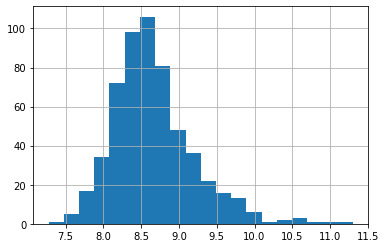

In [36]:
# histogram for HouseholdIncome to see the new distribution
data['HouseholdIncome_log'].hist(bins=20)

In [37]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,HouseholdIncome,HouseholdIncome_log,LoanAmount_log
0,1,0,0,0,0,5849,0.0,146.412162,7.0,1.0,2,1,5849.0,8.674026,4.986426
1,1,1,1,0,0,4583,1508.0,128.000000,7.0,1.0,0,0,6091.0,8.714568,4.852030
2,1,1,0,0,1,3000,0.0,66.000000,7.0,1.0,2,1,3000.0,8.006368,4.189655
3,1,1,0,1,0,2583,2358.0,120.000000,7.0,1.0,2,1,4941.0,8.505323,4.787492
4,1,0,0,0,0,6000,0.0,141.000000,7.0,1.0,2,1,6000.0,8.699515,4.948760


# Machine Learning

In [38]:
#define feature set
features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'HouseholdIncome_log', 'LoanAmount_log', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [39]:
#brief sample of the features before machine learning 
data[features].sample(10)

,Gender,Married,Dependents,Education,Self_Employed,HouseholdIncome_log,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area
553,1,1,0,1,0,8.473659,5.198497,7.0,0.0,2
470,1,1,1,0,1,8.617762,5.087596,7.0,1.0,1
443,1,0,1,0,0,10.537919,5.023881,7.0,1.0,1
105,1,1,1,0,0,8.314342,4.605170,7.0,1.0,2
518,1,0,0,0,0,8.794522,5.220356,7.0,1.0,1
71,1,1,2,1,1,8.229511,4.574711,7.0,1.0,1
542,0,0,1,0,0,8.203030,4.553877,7.0,1.0,1
367,1,0,0,0,0,8.541691,4.820282,7.0,0.0,0
258,1,1,0,0,0,9.728122,5.717028,7.0,1.0,0
570,1,1,1,0,0,8.550048,5.225747,7.0,1.0,2


In [40]:
#target value information
data['Loan_Status'].value_counts()

1    385
0    179
Name: Loan_Status, dtype: int64

In [41]:
# split the data into test and train
X = data[features]
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1)

In [42]:
X

,Gender,Married,Dependents,Education,Self_Employed,HouseholdIncome_log,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674026,4.986426,7.0,1.0,2
1,1,1,1,0,0,8.714568,4.852030,7.0,1.0,0
2,1,1,0,0,1,8.006368,4.189655,7.0,1.0,2
3,1,1,0,1,0,8.505323,4.787492,7.0,1.0,2
4,1,0,0,0,0,8.699515,4.948760,7.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972466,4.262680,7.0,1.0,0
610,1,1,3,0,0,8.320205,3.688879,4.0,1.0,0
611,1,1,1,0,0,9.025456,5.533389,7.0,1.0,2
612,1,1,2,0,0,8.933664,5.231109,7.0,1.0,2


In [43]:
X.values

array([[1., 0., 0., ..., 7., 1., 2.],
       [1., 1., 1., ..., 7., 1., 0.],
       [1., 1., 0., ..., 7., 1., 2.],
       ...,
       [1., 1., 1., ..., 7., 1., 2.],
       [1., 1., 2., ..., 7., 1., 2.],
       [0., 0., 0., ..., 7., 0., 1.]])

# logistic regression

In [44]:
#fit logistic regression to the train set
logreg = LogisticRegression(random_state=1,)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [45]:
#predict instances from test set
y_pred = logreg.predict(X_test)

In [46]:
accuracy_score(y_pred, y_test)

0.7943262411347518

In [47]:
logreg.score(X_test, y_test)

0.7943262411347518

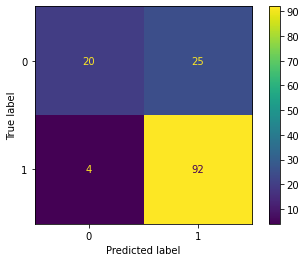

In [48]:
plot_confusion_matrix(logreg, X_test, y_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.44      0.58        45
           1       0.79      0.96      0.86        96

    accuracy                           0.79       141
   macro avg       0.81      0.70      0.72       141
weighted avg       0.80      0.79      0.77       141



In [50]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [51]:
roc_auc_score(y_test, y_pred_prob)

0.6986111111111111

In [51]:
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring = 'accuracy')
print(cv_scores)

[0.83185841 0.76106195 0.78761062 0.85840708 0.83928571]


In [52]:
cv_scores.mean()

0.8156447534766119

In [86]:
tol = [0.01, 0.001 ,0.0001]
C = [0.001, 0.01, 0.1, 1, 10]
max_iter=[100,150,200]
param_grid = dict( tol=tol, max_iter=max_iter, C=C,)

In [87]:
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)
grid_result = grid_model.fit(X, y)


print(grid_result.best_score_, grid_result.best_params_)


0.8157268170426066 {'C': 0.1, 'max_iter': 100, 'tol': 0.01}


# random forest

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [72]:
accuracy_score(y_pred_rf, y_test)

0.7801418439716312

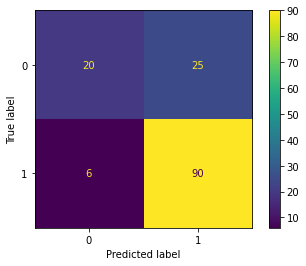

In [73]:
plot_confusion_matrix(rf, X_test, y_test)

In [58]:
y_pred_prob_rf = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_rf)

0.7171296296296297

In [59]:
rf.feature_importances_

array([0.02417192, 0.0309746 , 0.0519799 , 0.02618641, 0.02202772,
       0.24131387, 0.20051419, 0.04385351, 0.31146647, 0.04751141])

In [60]:
importances = [0.02417192, 0.0309746 , 0.0519799 , 0.02618641, 0.02202772,
       0.24131387, 0.20051419, 0.04385351, 0.31146647, 0.04751141]

In [61]:
features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'HouseholdIncome_log',
 'LoanAmount_log',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area']

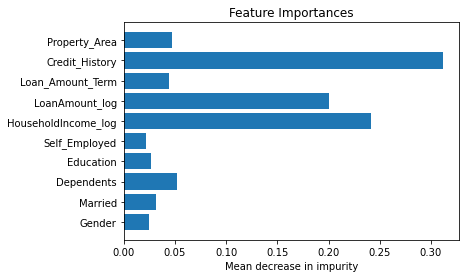

In [62]:
plt.barh(features, importances)
plt.xlabel('Mean decrease in impurity')
plt.title('Feature Importances')
plt.show()

In [63]:
#random forest hyperparameters 

In [64]:
max_features = np.arange(1,7,1)
n_estimators = np.arange(10, 250, 10)
min_samples_leaf = np.arange(1,7,1)
hyperparameters = dict(max_features = max_features, n_estimators = n_estimators,min_samples_leaf = min_samples_leaf)
grid = GridSearchCV(estimator = rf, param_grid = hyperparameters, cv = 5)

In [89]:
n_estimators

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240])

In [65]:
grid.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_features': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240])})

In [66]:
print(grid.best_params_, grid.best_score_)

{'max_features': 1, 'min_samples_leaf': 2, 'n_estimators': 50} 0.8174146649810365


In [110]:
accuracy_score(y_pred_rf1, y_test)

0.7872340425531915

In [109]:
y_pred_rf1 = grid.predict(X_test)

# multilayer perceptron

In [65]:
mlp = MLPClassifier(random_state=1)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [66]:
accuracy_score(y_pred_mlp, y_test)

0.7943262411347518

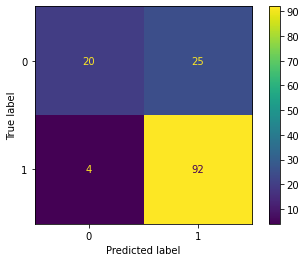

In [67]:
plot_confusion_matrix(mlp, X_test, y_test)

In [68]:
y_pred_prob_mlp = mlp.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_mlp)

0.726851851851852

# Naive Bayes

In [70]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [71]:
accuracy_score(y_pred_gnb, y_test)

0.7801418439716312

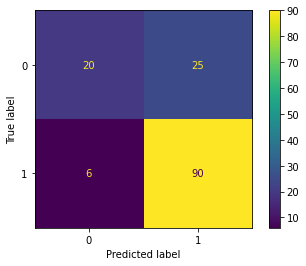

In [72]:
plot_confusion_matrix(gnb, X_test, y_test)

In [73]:
y_pred_prob_gnb = gnb.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_gnb)

0.7439814814814815

# Decision Tree

In [75]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [76]:
accuracy_score(y_pred_dt, y_test)

0.6737588652482269

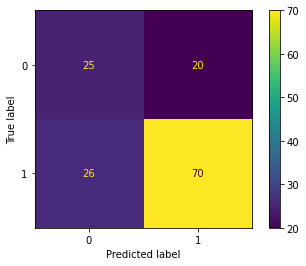

In [77]:
plot_confusion_matrix(dt, X_test, y_test)

In [78]:
y_pred_prob_dt = dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_dt)

0.642361111111111

## support vector machine

In [79]:
#support vector machine
svm = SVC(random_state = 1, probability = True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [80]:
accuracy_score(y_pred_svm, y_test)

0.7943262411347518

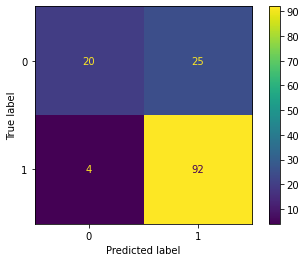

In [81]:
plot_confusion_matrix(svm, X_test, y_test)

In [82]:
#roc
y_pred_prob_svm = svm.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_prob_svm)

0.6983796296296296